In [84]:
import bs4
from time import sleep
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import pandas as pd 
from decimal import Decimal

#Utilize selenium to choose a tag(games/movies/etc) and then utilize the search field (you choose what you search)
def search_items(item):
    base_url = 'https://www.newgrounds.com/'
    browser = webdriver.Firefox()
    browser.get(base_url)
    browser.implicitly_wait(3)
    
    search_field = browser.find_elements_by_partial_link_text('Games')
    search_field[0].click()
    sleep(3)
    
    search_field = browser.find_element_by_name('terms')
    search_field.send_keys(item)
    search_field.submit()
    sleep(3)
    
    #Webscrape the results and convert them to a comprehensible table (dataset)
    page_source = browser.page_source
    soup = bs4.BeautifulSoup(page_source, 'html.parser')
    event_cells = soup.find_all('div', {'class': 'item-details'})
    
    name_list = []
    score_list = []
    view_list = []
    rateing_list = []
    for e in event_cells:
        name_list.append(e.select('div:nth-child(2) > div:nth-child(1) > div:nth-child(1) > h4:nth-child(1)')[0].text)
        score_list.append(Decimal(''.join(map(str, e.select('div:nth-child(2) > div:nth-child(2) > div:nth-child(1)'))).split(' ')[3][0:4]))
        view_list.append(int(e.select('div.item-details-meta dl dd')[1].text.split(' ')[0].replace(',','')))
        rateing_list.append(e.select('dd:nth-child(3) > span:nth-child(1)')[0].text[1:-1])
    
    list_of_tuples = list(zip(name_list, score_list ,view_list, rateing_list)) 
    df = pd.DataFrame(list_of_tuples, columns = ['Name', 'Score','Views','Rateings']) 
    return df
    
data_frame = search_items('bank')
data_frame

,Name,Score,Views,Rateings
0,Breaking the Bank,4.56,1781721,Everyone
1,Piggy Bank Smash,3.70,76127,Everyone
2,Bank Escape,3.01,5543,Everyone
3,Tank Bank,3.91,4523,Ages 13+
4,Bank Shooter4,2.79,4898,Ages 13+
5,Bank Shooter,2.50,3697,Everyone
6,Bank!,3.58,9006,Everyone
7,Big Bank Robbery 2.0,3.18,7748,Everyone
8,The Big Bank Robbery,3.01,6985,Everyone
9,Franklin: Bank Alone,3.09,4956,Everyone


<BarContainer object of 20 artists>

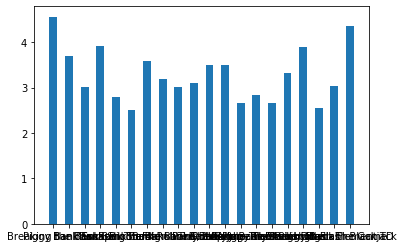

In [85]:
import matplotlib.pyplot as plt

#Create a barchart using rating(stars) or views, or make a piechart showing the distribution of the games with different age ratings
plt.bar(data_frame['Name'], data_frame['Score'], width=0.5, align='center')

<BarContainer object of 20 artists>

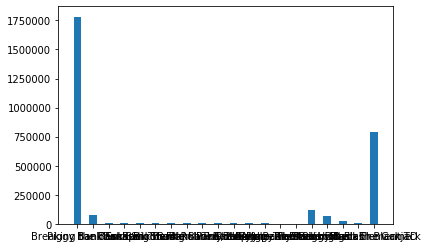

In [86]:
plt.bar(data_frame['Name'], data_frame['Views'], width=0.5, align='center')

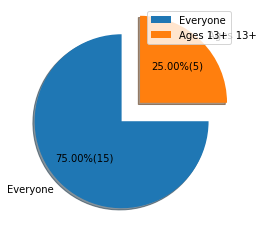

In [98]:
rateing_dict = {}

for rate in data_frame['Rateings']:
    if rate in rateing_dict:
        rateing_dict[rate] = rateing_dict[rate]+1
    else: 
        rateing_dict[rate] = 1

explode = (0.1, 0.2) 
fig1, ax1 = plt.subplots() 
ax1.pie(rateing_dict.values(), labels=rateing_dict.keys(), explode=explode, autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(rateing_dict.values())), 
        shadow=True, startangle=90)
ax1.set_aspect('equal')
ax1.legend(rateing_dict.keys(), loc='upper right')

plt.show()